In [1]:
from sitelen_palisa_maker import make_sitelen_img, h, w

from PIL import Image, ImageFont, ImageDraw
from tqdm.notebook import tqdm

from json import load

In [6]:
!rm -rf ./sitelen_palisa_images/*

In [ ]:
with open("nimi.json") as f:
    nimi = load(f)

In [7]:

for k,v in tqdm(nimi.items()):
    img = make_sitelen_img(v)
    img.save(f"sitelen_palisa_images/{k}.png")

In [26]:
from collections import Counter

In [27]:
dupes = [k for k,v in Counter(tuple(j) for j in nimi.values()).items() if v>1]

In [28]:
{k:v for k,v in nimi.items() if tuple(v) in dupes}

{}

In [29]:
names_order = (
    sorted([x for x in nimi.keys() if x[0] not in "{}"])+
    sorted([x for x in nimi.keys() if x[0] in "{}"])[::-1]
)

In [30]:
names_order

['a',
 'akesi',
 'ala',
 'alasa',
 'ale',
 'anpa',
 'ante',
 'anu',
 'awen',
 'e',
 'en',
 'epiku',
 'esun',
 'ijo',
 'ike',
 'ilo',
 'insa',
 'jaki',
 'jan',
 'jasima',
 'jelo',
 'jo',
 'kala',
 'kalama',
 'kama',
 'kasi',
 'ken',
 'kepeken',
 'kijetesantakalu',
 'kili',
 'kin',
 'kipisi',
 'kiwen',
 'ko',
 'kokosila',
 'kon',
 'ku',
 'kule',
 'kulupu',
 'kute',
 'la',
 'lanpan',
 'lape',
 'laso',
 'lawa',
 'leko',
 'len',
 'lete',
 'li',
 'lili',
 'linja',
 'lipu',
 'loje',
 'lon',
 'luka',
 'lukin',
 'lupa',
 'ma',
 'mama',
 'mani',
 'meli',
 'meso',
 'mi',
 'mije',
 'misikeke',
 'moku',
 'moli',
 'monsi',
 'monsuta',
 'mu',
 'mun',
 'musi',
 'mute',
 'n',
 'namako',
 'nanpa',
 'nasa',
 'nasin',
 'nena',
 'ni',
 'nimi',
 'noka',
 'o',
 'oko',
 'olin',
 'ona',
 'open',
 'pakala',
 'pali',
 'palisa',
 'pan',
 'pana',
 'pi',
 'pilin',
 'pimeja',
 'pini',
 'pipi',
 'poka',
 'poki',
 'pona',
 'pu',
 'sama',
 'seli',
 'selo',
 'seme',
 'sewi',
 'sijelo',
 'sike',
 'sin',
 'sina',
 'sinpin

In [31]:
special_cases={
    "{exclamation}": "!",
    "{colon}" : ":",
    "{name_start}": "[",
    "{name_end}": "]",
    "kijetesantakalu": "kij.",
    "{period}": ".",
    "{comma}": ",",
    "{question}": "?"
}

In [32]:
def create_table_image(names, sort = False, columns=12, hbuffer=40, vbuffer=40, text=True):
    if sort:
        names_ = names
    else:
        names_ = [i for i in names if i in names_order]
    
    total_rows = (len(names)-1)//columns + 1
    
    final_image = Image.new("RGBA", ((w+hbuffer)*columns+hbuffer, (h+vbuffer)*total_rows+vbuffer), color=(0,20,20,255))

    # get a font
    fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMonoBold.ttf", 40)
    # get a drawing context
    d = ImageDraw.Draw(final_image)
    
    
        
    for i, n in enumerate(names_):
        column, row = i%columns, i//columns
        
        if n in special_cases:
            n_display = special_cases[n]
        elif n[0]=="~":
            n_display = n[1:]
        else:
            n_display = n
            
        img = make_sitelen_img(nimi[n])
        final_image.alpha_composite(img, ( hbuffer + (hbuffer+w)*column, vbuffer + (vbuffer+h)*row))
        
        if text:
            font_w, font_h = d.textsize(n_display, font=fnt)
            d.multiline_text(( hbuffer + (hbuffer+w)*column + (w-font_w)/2, vbuffer + (vbuffer+h)*row + h - vbuffer/2) , n_display, font=fnt, fill=(255, 255, 255))
    return final_image
        

In [33]:
im_final = create_table_image(names_order)
im_final.save("full_table.png")

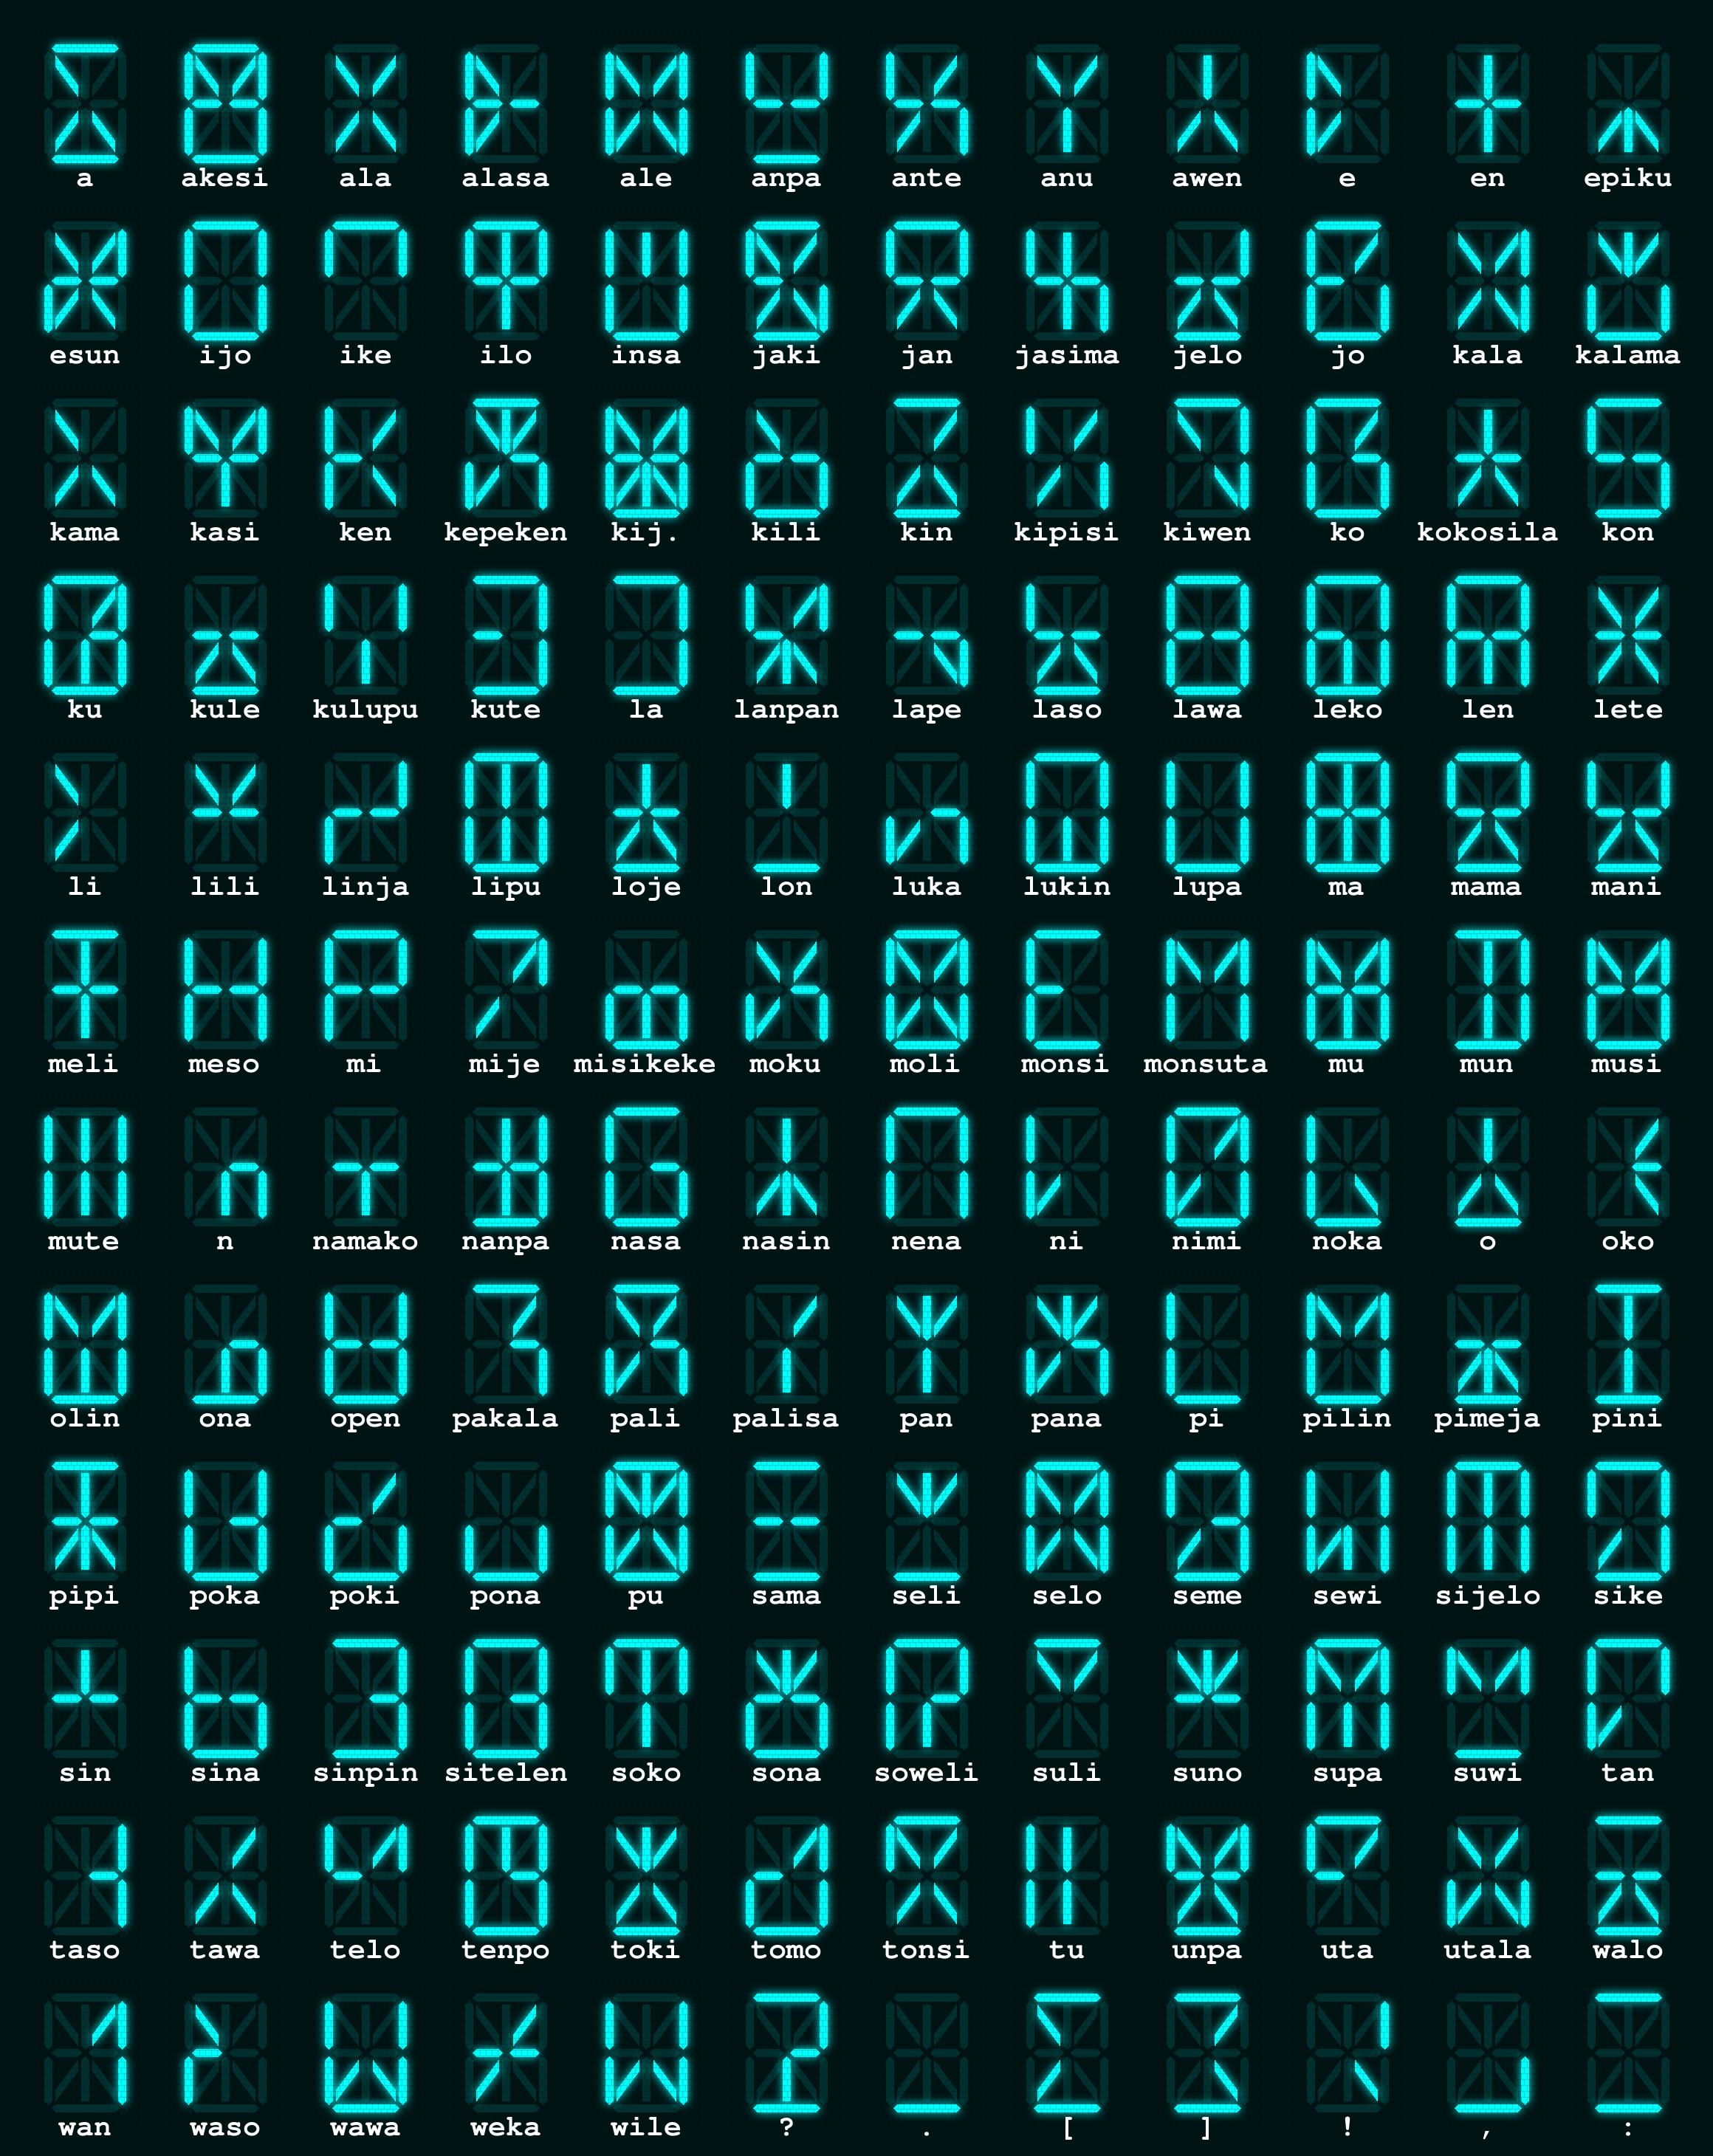

In [34]:
im_final

### You can use the create_table_image function to make sentences.

In [24]:
text = "mi jan {name_start} kule akesi tonsi ante pana ilo nanpa {name_end} {period} o kama pona tawa lipu pi sitelen palisa {exclamation}"

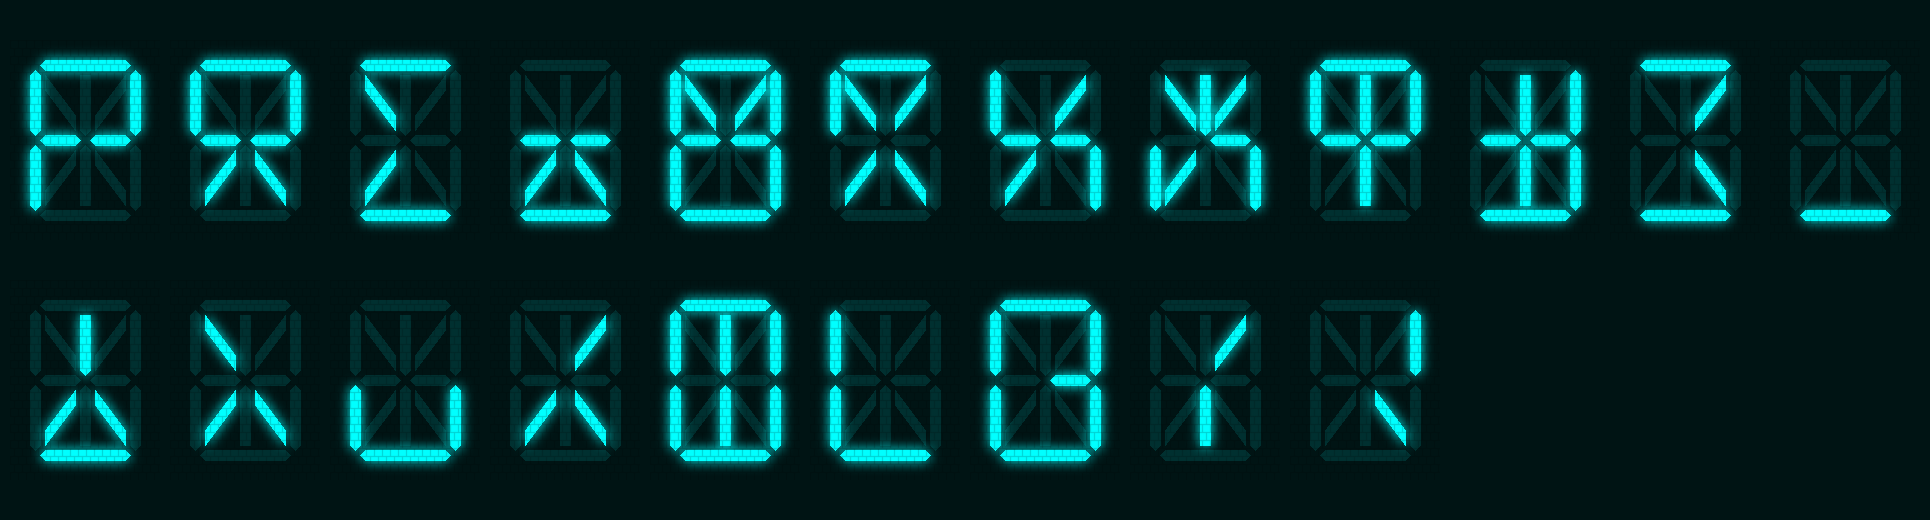

In [25]:
create_table_image(text.split(" "), hbuffer=10, text=False)